In [27]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.special import comb
import sympy as sp
import sys
import os

import pandas as pd

from Base.Combo_CC_Base import Combo_CC
#from Base.Combo_plot_base import Combo_plot
from DynamicModel_Package.DynamicModel2D_Base import DynamicModel2D


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
def convert_nullcline(expr,variable):
    expr_str = str(expr)
    expr = sp.sympify(expr_str)

    def f (var,pars):
        if len(pars)>0:
            if str(variable)=='x':
                new_dict = {'x':var}
                new_dict.update(pars)
            else:
                new_dict = {'y':var}
                new_dict.update(pars)
        else:
            if str(variable)=='x':
                new_dict = {'x':var}
            else:
                new_dict = {'y':var}
        return expr.subs(new_dict)

    return f

def det_y_fun_x (n):
    y_fun_x = True
    if str(n[1])=='y':
        y_fun_x = False
    return y_fun_x
import sympy.abc as abc
def find_nullclines_and_update (model: DynamicModel2D,dxdt,dydt,variables = [abc.x,abc.y]):
    #dxdt and dydt have to be sympy expressions
    x,y = variables
    nc_x_x = sp.solve(sp.Eq(dxdt,0),x) #result as a function of y
    nc_x_y = sp.solve(sp.Eq(dxdt,0),y) #result as a function of x
    nc_y_x = sp.solve(sp.Eq(dydt,0),x)
    nc_y_y = sp.solve(sp.Eq(dydt,0),y)
    nc_x = []
    nc_y = []
    for n in nc_x_x:
        nc_x.append((n,y))
    for n in nc_x_y:
        nc_x.append((x,n))
    for n in nc_y_x:
        nc_y.append((n,y))
    for n in nc_y_y:
        nc_y.append((x,n))
    print(nc_x)
    print(nc_y)
    for n in nc_x:
        y_fun_x = det_y_fun_x(n)
        if y_fun_x:
            f = convert_nullcline(n[1],x)
        else:
            f = convert_nullcline(n[0],y)
        model.add_nullcline('x',f,model.parameters_x,y_fun_x)
    for n in nc_y:
        y_fun_x = det_y_fun_x(n)
        if y_fun_x:
            f = convert_nullcline(n[1],x)
        else:
            f = convert_nullcline(n[0],y)
        model.add_nullcline('y',f,model.parameters_y,y_fun_x)

    return model

[(0, y), ((5*a - sqrt(5)*sqrt(a*(5*a - 2*y - 2)))/a, y), ((5*a + sqrt(5)*sqrt(a*(5*a - 2*y - 2)))/a, y), (x, -a*x**2/10 + a*x - 1)]
[(-10*b/(y - 10), y), (x, 0), (x, -10*b/x + 10)]


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

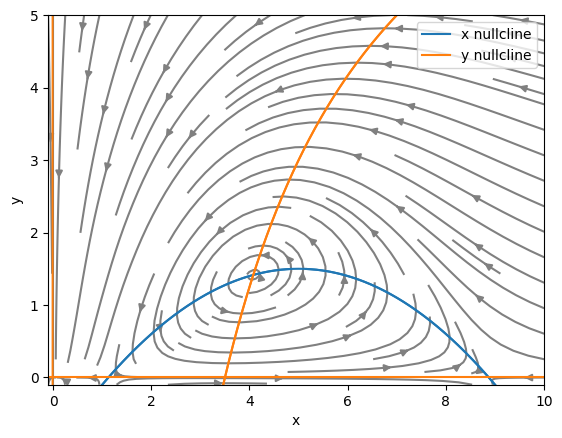

In [29]:
a_value = 1
b_value = 3.5
def dxdt_a1 (variables,parameters):
    x = variables['x']
    y = variables['y']
    a = parameters['a']
    return x*(a*x*(1-x/10)-1-y)
def dydt_a1 (variables,parameters):
    x = variables['x']
    y = variables['y']
    b = parameters['b']
    return y*(x*(1-y/10)-b*1)
x,y,a,b = sp.symbols('x y a b')
dxdt_a1_sp = x*(a*x*(1-x/10)-1-y)
dydt_a1_sp = y*(x*(1-y/10)-b*1)

archetypea1 = DynamicModel2D('x',dxdt_a1,{'a':a_value,'b':b_value},'y',dydt_a1,{'a':a_value,'b':b_value})
archetypea1 = find_nullclines_and_update(archetypea1,dxdt_a1_sp,dydt_a1_sp)
archetypea1.plot_phase_portrait(0,20,20,[-0.1,10],[-0.1,5],['tab:blue','tab:orange'])


[(0, y), (10*(5*a - sqrt(a*(25*a - b - y)))/a, y), (10*(5*a + sqrt(a*(25*a - b - y)))/a, y), (x, -a*x**2/100 + a*x - b)]
[(1, y), (x, 0)]


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

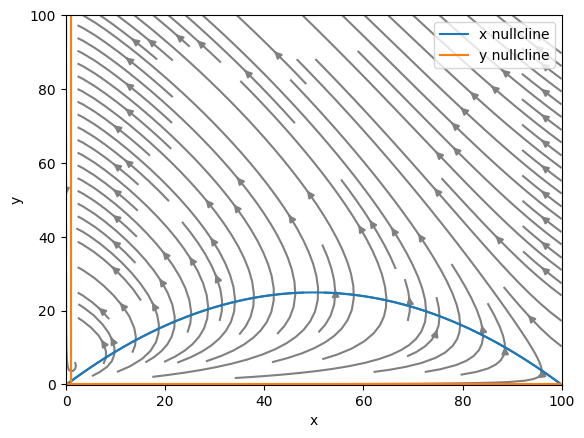

In [30]:
a_value = 1
b_value = 0.1
def dxdt_a1 (variables,parameters):
    x = variables['x']
    y = variables['y']
    a = parameters['a']
    b = parameters['b']
    return x*(a*x*(1-x/100)-b-y)
def dydt_a1 (variables,parameters):
    x = variables['x']
    y = variables['y']
    return y*(x-1)
x,y,a,b = sp.symbols('x y a b')
dxdt_a1_sp = x*(a*x*(1-x/100)-b-y)
dydt_a1_sp = y*(x-1)

archetypea1 = DynamicModel2D('x',dxdt_a1,{'a':a_value,'b':b_value},'y',dydt_a1,{})
archetypea1 = find_nullclines_and_update(archetypea1,dxdt_a1_sp,dydt_a1_sp)
archetypea1.plot_phase_portrait(0,20,20,[-0.1,100],[-0.1,100],['tab:blue','tab:orange'])


[(0, y), (10*(5*a - sqrt(a*(25*a - b - y**2)))/a, y), (10*(5*a + sqrt(a*(25*a - b - y**2)))/a, y), (x, -sqrt(-a*x**2 + 100*a*x - 100*b)/10), (x, sqrt(-a*x**2 + 100*a*x - 100*b)/10)]
[(1, y), (x, 0)]


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

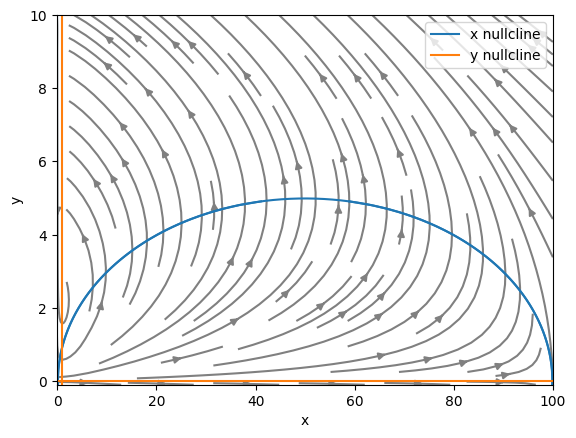

In [31]:
def dxdt_a2 (variables,parameters):
    x = variables['x']
    y = variables['y']
    a = parameters['a']
    b = parameters['b']
    return x*(a*x*(1-x/100)-b-y**2)
def dydt_a2 (variables,parameters):
    x = variables['x']
    y = variables['y']
    return y*(x-1)
x,y,a,b = sp.symbols('x y a b')
dxdt_a2_sp = x*(a*x*(1-x/100)-b-y**2)
dydt_a2_sp = y*(x-1)

archetypea2 = DynamicModel2D('x',dxdt_a2,{'a':a_value,'b':b_value},'y',dydt_a2,{})
archetypea2 = find_nullclines_and_update(archetypea2,dxdt_a2_sp,dydt_a2_sp)
archetypea2.plot_phase_portrait(0,20,20,[-0.1,100],[-0.1,10],['tab:blue','tab:orange'])


[(0, y), (10*(5*a - 5*y - sqrt(25*a**2 - a*b - 50*a*y + 25*y**2))/a, y), (10*(5*a - 5*y + sqrt(25*a**2 - a*b - 50*a*y + 25*y**2))/a, y), (x, -a*x/100 + a - b/x)]
[(1, y), (x, 0)]


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

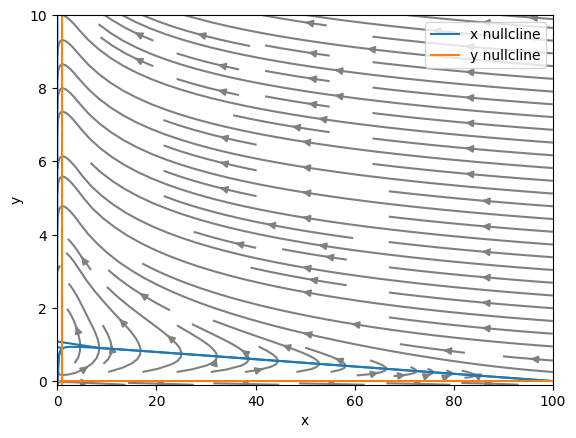

In [32]:
def dxdt_a3 (variables,parameters):
    x = variables['x']
    y = variables['y']
    a = parameters['a']
    b = parameters['b']
    return x*(a*x*(1-x/100)-b-y*x)
def dydt_a3 (variables,parameters):
    x = variables['x']
    y = variables['y']
    return y*(x-1)
x,y,a,b = sp.symbols('x y a b')
dxdt_a3_sp = x*(a*x*(1-x/100)-b-x*y)
dydt_a3_sp = y*(x-1)

archetypea3 = DynamicModel2D('x',dxdt_a3,{'a':a_value,'b':b_value},'y',dydt_a3,{})
archetypea3 = find_nullclines_and_update(archetypea3,dxdt_a3_sp,dydt_a3_sp)
archetypea3.plot_phase_portrait(0,20,20,[-0.1,100],[-0.1,10],['tab:blue','tab:orange'])


generating new df
0.01


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

0.0143845


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)


0.02069138


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

0.02976351


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

0.04281332


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

0.06158482


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

0.08858668


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

0.4


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

0.5455


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

0.785


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

1.13


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

1.62


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

2.34


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

3.36


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

4.8


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

6.95


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

10.0


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

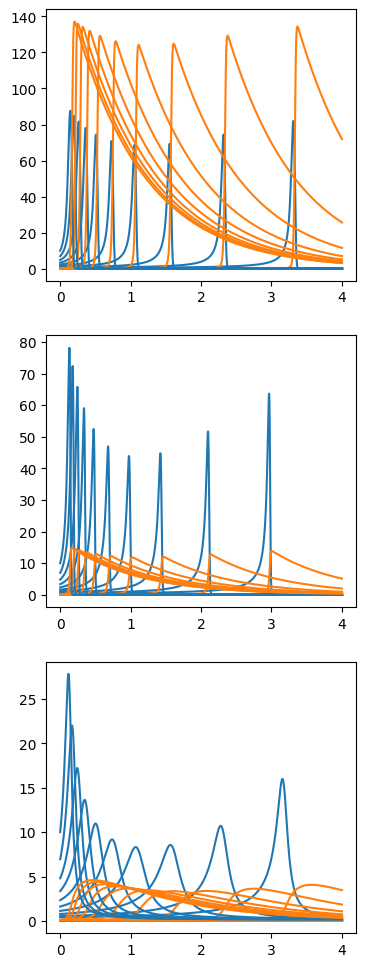

In [33]:
x_input = np.array([0.01,0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
        0.06158482,  0.08858668,0.4,0.5455,0.785,1.13,1.62,2.34,3.36,4.8,6.95,10])
#x_input = np.logspace(0,1.5,20)
y_max_1 = []
y_max_2 = []
y_max_3 = []
x_max_1 = []
x_max_2 = []
x_max_3 = []
file_path = f'df_integrate_properties_a{str(a_value).replace(".","")}_b{str(b_value).replace(".","")}.csv'
calc_anyway = True
if os.path.exists(file_path) and calc_anyway==False:
   print("reading from file")
   df_integrate_properties = pd.read_csv(file_path,index_col='Unnamed: 0')
else:
    df_integrate_properties = pd.DataFrame(columns = ['combo_num','x_input','x_max','time_to_max_x','y_max','refractory_period'])
    fig,axs = plt.subplots(nrows = 3, figsize = (4,12))
    print("generating new df")
    for inp in x_input:
        print(inp)
        intg1 = archetypea1.euler_integrate_keep_positive({'x':inp,'y':0.1,'t':0},4,0.001)
        axs[0].plot(intg1['t'],intg1['x'],color = 'tab:blue')
        axs[0].plot(intg1['t'],intg1['y'],color = 'tab:orange')

        intg2 = archetypea2.euler_integrate_keep_positive({'x':inp,'y':0.1,'t':0},4,0.001)
        axs[1].plot(intg2['t'],intg2['x'],color = 'tab:blue')
        axs[1].plot(intg2['t'],intg2['y'],color = 'tab:orange')

        intg3 = archetypea3.euler_integrate_keep_positive({'x':inp,'y':0.1,'t':0},4,0.001)
        axs[2].plot(intg3['t'],intg3['x'],color = 'tab:blue')
        axs[2].plot(intg3['t'],intg3['y'],color = 'tab:orange')

        intg1['x'] = pd.to_numeric(intg1['x'])
        intg2['x'] = pd.to_numeric(intg2['x'])
        intg3['x'] = pd.to_numeric(intg3['x'])

        row1 = {'combo_num':['A1'],'x_input':[inp],'x_max':[intg1['x'].max()],'time_to_max_x':[intg1['t'][intg1['x'].idxmax()]],'y_max':[intg1['y'].max()],
                'refractory_period':[next((intg1['t'].values[::-1][i] for i in range(len(intg1)) if intg1['y'].values[::-1][i] > 1),0)]}
        row2 = {'combo_num':['A2'],'x_input':[inp],'x_max':[intg2['x'].max()],'time_to_max_x':[intg2['t'][intg2['x'].idxmax()]],'y_max':[intg2['y'].max()],
                'refractory_period':[next((intg2['t'].values[::-1][i] for i in range(len(intg2)) if intg2['y'].values[::-1][i] > 1),0)]}
        row3 = {'combo_num':['A3'],'x_input':[inp],'x_max':[intg3['x'].max()],'time_to_max_x':[intg3['t'][intg1['x'].idxmax()]],'y_max':[intg3['y'].max()],
                'refractory_period':[next((intg3['t'].values[::-1][i] for i in range(len(intg3)) if intg3['y'].values[::-1][i] > 1),0)]}

        df_integrate_properties = pd.concat([df_integrate_properties,pd.DataFrame(row1),pd.DataFrame(row2),pd.DataFrame(row3)],ignore_index=True)
    df_integrate_properties.to_csv(file_path)

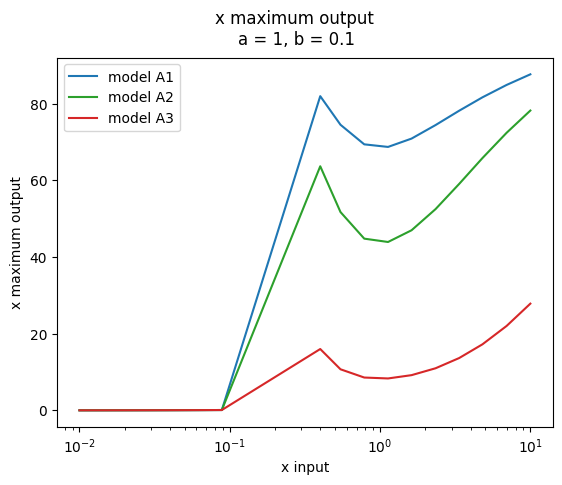

In [34]:
fig,ax = fig,axs = plt.subplots()
df1 = df_integrate_properties[df_integrate_properties['combo_num']=='A1']
df2 = df_integrate_properties[df_integrate_properties['combo_num']=='A2']
df3 = df_integrate_properties[df_integrate_properties['combo_num']=='A3']

ax.plot(df1['x_input'],df1['x_max'],label = 'model A1',color = 'tab:blue')
ax.plot(df2['x_input'],df2['x_max'],label = 'model A2',color = 'tab:green')
ax.plot(df3['x_input'],df3['x_max'],label = 'model A3',color = 'tab:red')
ax.set_xscale('log')
ax.set_xlabel('x input')
#ax.set_yscale('log')
ax.set_ylabel('x maximum output')
ax.legend()
fig.suptitle(f'x maximum output \na = {a_value}, b = {b_value}')
fig.savefig(f'figures/maximum_output_a{a_value}_b{b_value}.png',dpi=200)

In [35]:
df2

,combo_num,x_input,x_max,time_to_max_x,y_max,refractory_period
1,A2,0.010000,0.010000,0,0.100000,0
4,A2,0.014384,0.014384,0,0.100000,0
7,A2,0.020691,0.020691,0,0.100000,0
10,A2,0.029764,0.029764,0,0.100000,0
13,A2,0.042813,0.042813,0,0.100000,0
16,A2,0.061585,0.061585,0,0.100000,0
19,A2,0.088587,0.088587,0,0.100000,0
22,A2,0.400000,63.642252,2.966,13.864503,4.001
25,A2,0.545500,51.703436,2.098,12.788561,4.001
28,A2,0.785000,44.769879,1.423,12.030675,3.958


In [36]:
if os.path.exists(file_path) and calc_anyway==False:
    x_input = df1['x_input'].values
sens1 = np.array([((df1.iloc[i]['x_max']-x_input[i])-(df1.iloc[i-1]['x_max']-x_input[i-1]))/(x_input[i]-x_input[i-1]) for i in range(1,len(x_input))])
sens2 = np.array([((df2.iloc[i]['x_max']-x_input[i])-(df2.iloc[i-1]['x_max']-x_input[i-1]))/(x_input[i]-x_input[i-1]) for i in range(1,len(x_input))])
sens3 = np.array([((df3.iloc[i]['x_max']-x_input[i])-(df3.iloc[i-1]['x_max']-x_input[i-1]))/(x_input[i]-x_input[i-1]) for i in range(1,len(x_input))])

sens1 = sens1[sens1>0]
sens2 = sens2[sens2>0]
sens3 = sens3[sens3>0]
df_properties = pd.DataFrame()

print(x_input)
print(sens1)
print(sens2)
print(sens3)
print(sens1[:3].mean())
print(sens2[:3].mean())
print(sens3[:3].mean())

[ 0.01        0.0143845   0.02069138  0.02976351  0.04281332  0.06158482
  0.08858668  0.4         0.5455      0.785       1.13        1.62
  2.34        3.36        4.8         6.95       10.        ]
[261.77179152   3.43622346   3.89579984   2.66821914   1.42542486
   0.50207968]
[203.08139736   5.23351998   6.66291204   5.43899915   3.67924994
   2.06668912   0.90156086]
[50.07144797  0.75643227  1.49055659  1.61497877  1.48495069  1.22755746
  0.90725987]
89.70127160628569
71.65927645657307
17.439478943381022


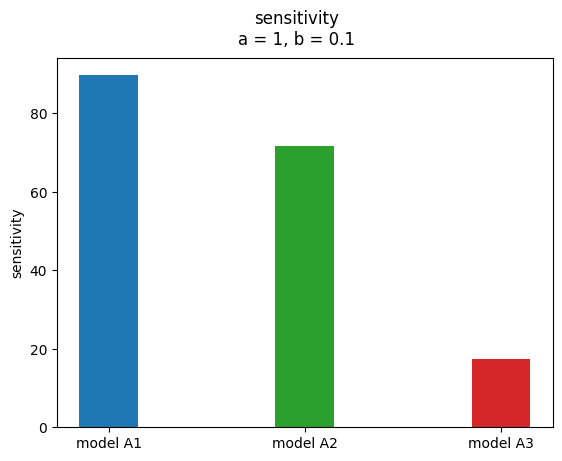

In [37]:
models = ['model A1','model A2','model A3']
fig,ax = plt.subplots()
ax.bar(models,[sens1[:3].mean(),sens2[:3].mean(),sens3[:3].mean()],color = ['tab:blue','tab:green','tab:red'],width = 0.3)
ax.set_ylabel('sensitivity')
fig.suptitle(f'sensitivity\na = {a_value}, b = {b_value}')

fig.savefig(f'figures/sensitivity_a{a_value}_b{b_value}.png',dpi=200)

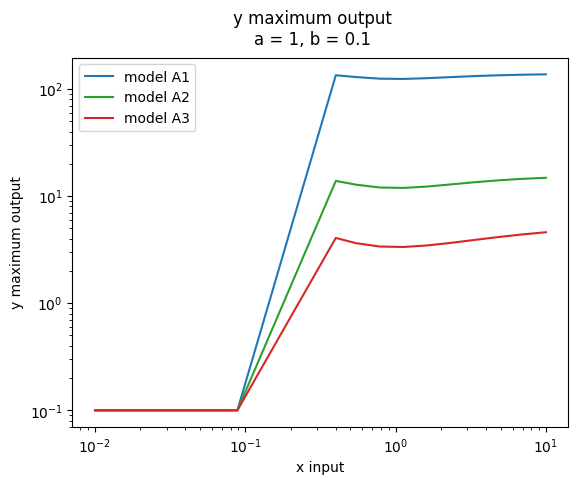

In [38]:
fig,ax = plt.subplots()
ax.plot(x_input,df1['y_max'],label = 'model A1',color = 'tab:blue')
ax.plot(x_input,df2['y_max'],label = 'model A2',color = 'tab:green')
ax.plot(x_input,df3['y_max'],label = 'model A3',color = 'tab:red')
ax.set_xscale('log')
ax.set_xlabel('x input')
ax.set_ylabel('y maximum output')
ax.legend()
ax.set_yscale('log')
fig.suptitle(f'y maximum output\na = {a_value}, b = {b_value}')

fig.savefig(f'figures/y_output_a{a_value}_b{b_value}.png',dpi=200)

In [39]:
intg1 = archetypea1.euler_integrate_keep_positive({'x':10,'y':0.1,'t':0},5,0.001)
intg2 = archetypea2.euler_integrate_keep_positive({'x':10,'y':0.1,'t':0},5,0.001)
intg3 = archetypea3.euler_integrate_keep_positive({'x':10,'y':0.1,'t':0},5,0.001)

intg1.to_csv(f"df_traj_A1_a{str(a_value).replace('.','')}_b{str(b_value).replace('.','')}.csv")
intg2.to_csv(f"df_traj_A2_a{str(a_value).replace('.','')}_b{str(b_value).replace('.','')}.csv")
intg3.to_csv(f"df_traj_A3_a{str(a_value).replace('.','')}_b{str(b_value).replace('.','')}.csv")

/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/DynamicModel_Package/ModelBase.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,variables_initial_df],ignore_index=True)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.

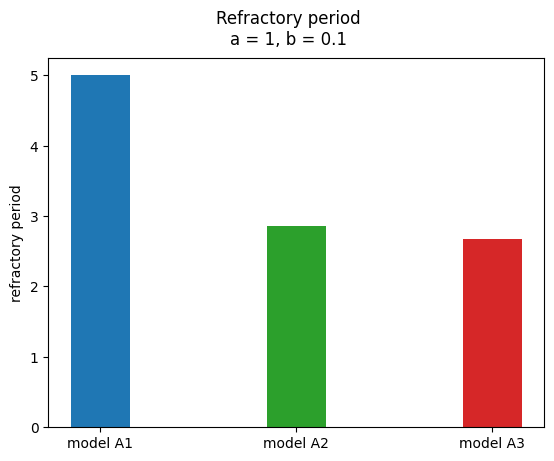

In [40]:
models = ['model A1','model A2','model A3']
fig,ax = plt.subplots()
refrac1 = next(intg1['t'].values[::-1][i] for i in range(len(intg1)) if intg1['y'].values[::-1][i] > 1)
refrac2 = next(intg2['t'].values[::-1][i] for i in range(len(intg2)) if intg2['y'].values[::-1][i] > 1)
refrac3 = next(intg3['t'].values[::-1][i] for i in range(len(intg3)) if intg3['y'].values[::-1][i] > 1)

ax.bar(models,[refrac1,refrac2,refrac3],color = ['tab:blue','tab:green','tab:red'],width = 0.3)
ax.set_ylabel('refractory period')
fig.suptitle(f'Refractory period\na = {a_value}, b = {b_value}')

fig.savefig(f'figures/refractory_period_a{a_value}_b{b_value}.png',dpi=200)

In [41]:
import pandas as pd
refrac1 = next(intg1['t'].values[::-1][i] for i in range(len(intg1)) if intg1['y'].values[::-1][i] > 1)
intg1

,t,x,y
0,0,10,0.100000
1,0.001,10.088,0.100900
2,0.002,10.177475,0.101817
3,0.003,10.26846,0.102751
4,0.004,10.360992,0.103704
...,...,...,...
4996,4.996,0,1.143132
4997,4.997,0,1.141989
4998,4.998,0,1.140847
4999,4.999,0,1.139706


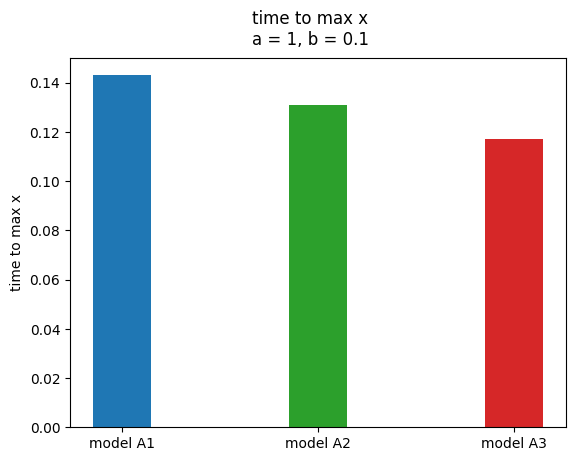

In [42]:
intg1['x'] = pd.to_numeric(intg1['x'])
intg2['x'] = pd.to_numeric(intg2['x'])
intg3['x'] = pd.to_numeric(intg3['x'])

time_to_max_x = [intg1.iloc[intg1['x'].idxmax()]['t'],intg2.iloc[intg2['x'].idxmax()]['t'],intg3.iloc[intg3['x'].idxmax()]['t']]
fig,ax = plt.subplots()

ax.bar(models,time_to_max_x,color = ['tab:blue','tab:green','tab:red'],width = 0.3)
ax.set_ylabel('time to max x')
fig.suptitle(f'time to max x\na = {a_value}, b = {b_value}')
fig.savefig(f'figures/time_to_max_x_a{a_value}_b{b_value}.png',dpi=200)

0.014685138507112712
0.014933612977691088
0.009576546715546273


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


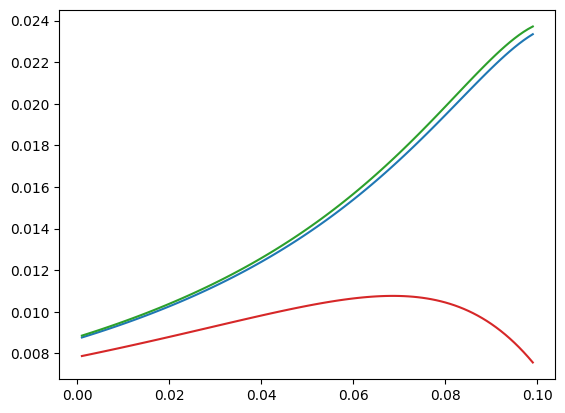

In [43]:
log_x1 = np.log(intg1['x'])
log_x2 = np.log(intg2['x'])
log_x3 = np.log(intg3['x'])
log_y1 = np.log(intg1['y'])
log_y2 = np.log(intg2['y'])
log_y3 = np.log(intg3['y'])

dlog_x1 = np.diff(log_x1)
dlog_x2 = np.diff(log_x2)
dlog_x3 = np.diff(log_x3)
dlog_y1 = np.diff(log_y1)
dlog_y2 = np.diff(log_y2)
dlog_y3 = np.diff(log_y3)


t_max_1 = t_max_2 = t_max_3 = 0.1

print(dlog_x1[intg1['t'].iloc[1:]<t_max_1].mean())
print(dlog_x2[intg2['t'].iloc[1:]<t_max_2].mean())
print(dlog_x3[intg3['t'].iloc[1:]<t_max_3].mean())
plt.plot(intg1['t'][1:][intg1['t'].iloc[1:]<t_max_1],dlog_x1[intg1['t'].iloc[1:]<t_max_1],color= 'tab:blue')
plt.plot(intg2['t'][1:][intg2['t'].iloc[1:]<t_max_2],dlog_x2[intg2['t'].iloc[1:]<t_max_2],color= 'tab:green')
plt.plot(intg3['t'][1:][intg3['t'].iloc[1:]<t_max_3],dlog_x3[intg3['t'].iloc[1:]<t_max_3],color= 'tab:red')


In [44]:
df_comparison = pd.DataFrame(columns = ['1/(x_max_output)','1/sensitivity','y_max_output','refractory_period','time_to_max_x','1/dlog_x'])
df_comparison.loc['A1'] = {'1/(x_max_output)':df1['x_max'].max(),
                       '1/sensitivity':1/sens1[:3].mean(),
                       'y_max_output':1/df1['y_max'].max(),
                       'refractory_period':refrac1,
                       'time_to_max_x':intg1.iloc[intg1['x'].idxmax()]['t'],
                       '1/dlog_x':[1/dlog_x1[dlog_x1>0].mean()]}
df_comparison.loc['A2'] = {'1/(x_max_output)':df2['x_max'].max(),
                       '1/sensitivity':1/sens2[:3].mean(),
                       'y_max_output':1/df2['y_max'].max(),
                       'refractory_period':refrac2,
                       'time_to_max_x':intg2.iloc[intg2['x'].idxmax()]['t'],
                       '1/dlog_x':[1/dlog_x2[dlog_x2>0].mean()]}
df_comparison.loc['A3'] = {'1/(x_max_output)':df3['x_max'].max(),
                       '1/sensitivity':1/sens3[:3].mean(),
                       'y_max_output':1/df3['y_max'].max(),
                       'refractory_period':refrac3,
                       'time_to_max_x':intg3.iloc[intg3['x'].idxmax()]['t'],
                       '1/dlog_x':[1/dlog_x2[dlog_x2>0].mean()]}

In [45]:
df_comparison

,1/(x_max_output),1/sensitivity,y_max_output,refractory_period,time_to_max_x,1/dlog_x
A1,87.613620,0.011148,0.007294,5.000,0.143,[65.88794865639328]
A2,78.170513,0.013955,0.067412,2.864,0.131,[63.70642797415748]
A3,27.825338,0.057341,0.217378,2.680,0.117,[63.70642797415748]


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
15


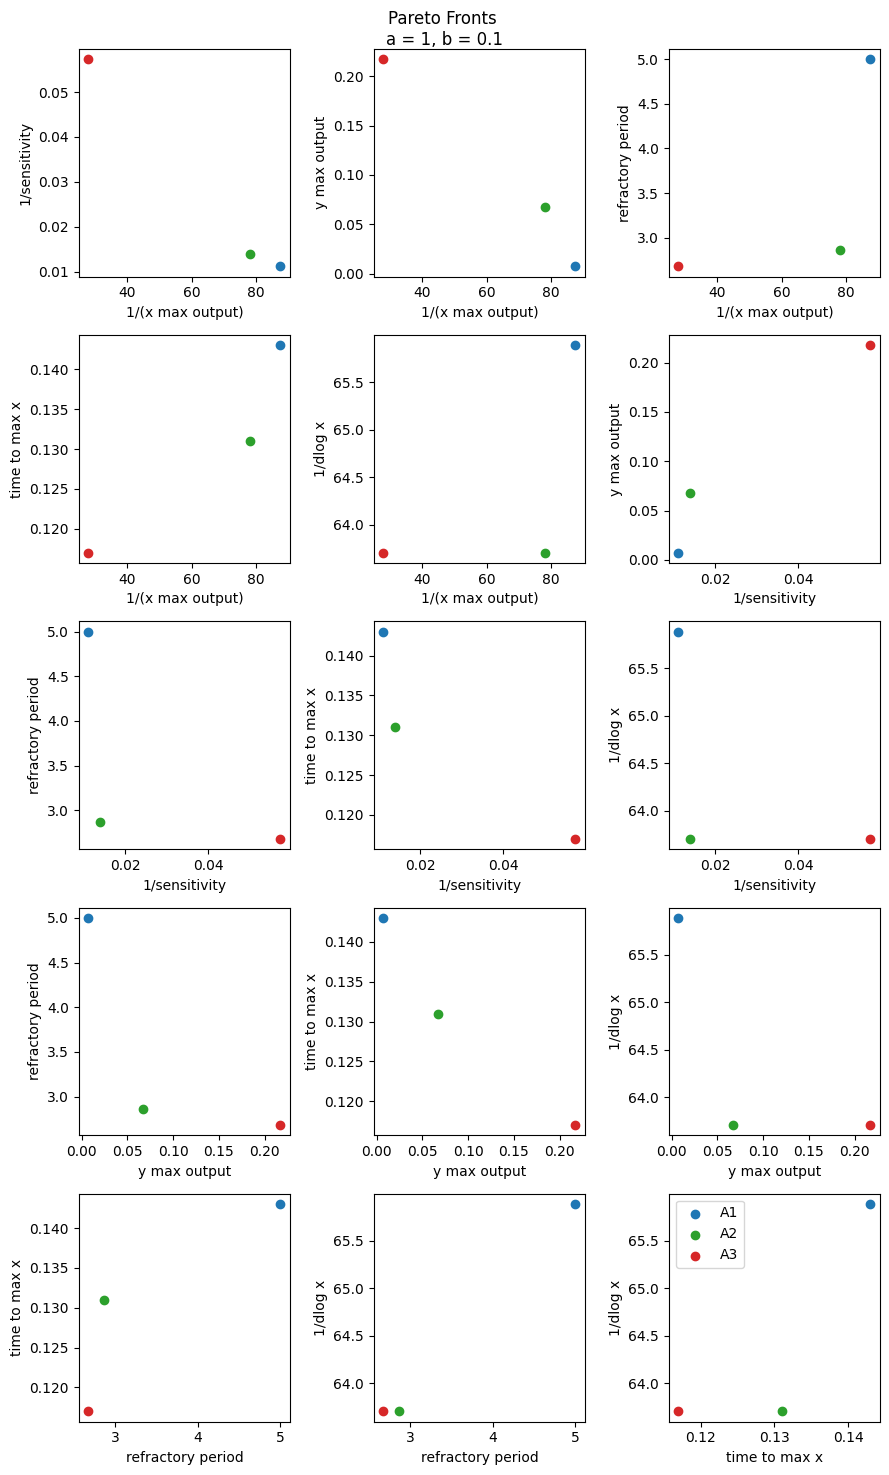

In [46]:
from itertools import combinations
%matplotlib inline
# Define the list
elements = [0, 1, 2, 3, 4,5]

# Generate all combinations of length 2
combinations_of_two = list(combinations(elements, 2))

# Print the results
print(combinations_of_two)
print(len(combinations_of_two))
import math
ncols = 3
nrows = math.ceil(len(combinations_of_two)/ncols)
fig,axs = plt.subplots(nrows = nrows, ncols = ncols,figsize = (3*ncols,3*nrows))
for i in range(len(combinations_of_two)):
    ax = axs[int(i/ncols),i%ncols]
    col1 = df_comparison.columns[combinations_of_two[i][0]]
    col2 = df_comparison.columns[combinations_of_two[i][1]]
    if i==len(combinations_of_two)-1:
        ax.scatter(df_comparison.loc['A1'][col1],df_comparison.loc['A1'][col2],c = 'tab:blue',label = 'A1')
        ax.scatter(df_comparison.loc['A2'][col1],df_comparison.loc['A2'][col2],c = 'tab:green',label = 'A2')
        ax.scatter(df_comparison.loc['A3'][col1],df_comparison.loc['A3'][col2],c = 'tab:red',label = 'A3')
        ax.legend()
    else:
        ax.scatter(df_comparison.loc['A1'][col1],df_comparison.loc['A1'][col2],c = 'tab:blue')
        ax.scatter(df_comparison.loc['A2'][col1],df_comparison.loc['A2'][col2],c = 'tab:green')
        ax.scatter(df_comparison.loc['A3'][col1],df_comparison.loc['A3'][col2],c = 'tab:red')
    ax.set_xlabel(col1.replace("_", " "))
    ax.set_ylabel(col2.replace("_", " "))

for i in range(len(combinations_of_two),nrows*ncols):
    ax = axs[int(i/ncols),i%ncols]
    ax.set_axis_off()
fig.suptitle(f'Pareto Fronts \na = {a_value}, b = {b_value}')
fig.tight_layout()
fig.savefig(f'figures/pareto_fronts_a{a_value}_b{b_value}.png',dpi = 200)

In [47]:
df_comparison.to_csv(f"df_comparison_a{str(a_value).replace('.','')}_b{str(b_value).replace('.','')}.csv")
df_maximize = pd.DataFrame(columns = ['x_max_output','1/(time_to_max_x)','1/(y_max_output)','dlog_x'])
df_maximize.loc['A1'] = {'x_max_output':df1['x_max'].max(),
                       '1/(y_max_output)':1/df1['y_max'].max(),
                       '1/(time_to_max_x)':1/intg1.iloc[intg1['x'].idxmax()]['t'],
                       'dlog_x':int(dlog_x1[dlog_x1>0].mean()*1000)/1000}
df_maximize.loc['A2'] = {'x_max_output':df2['x_max'].max(),
                       '1/(y_max_output)':1/df2['y_max'].max(),
                       '1/(time_to_max_x)':1/intg2.iloc[intg2['x'].idxmax()]['t'],
                       'dlog_x':int(dlog_x2[dlog_x2>0].mean()*1000)/1000}
df_maximize.loc['A3'] = {'x_max_output':df3['x_max'].max(),
                       '1/(y_max_output)':1/df3['y_max'].max(),
                       '1/(time_to_max_x)':1/intg3.iloc[intg3['x'].idxmax()]['t'],
                       'dlog_x':int(dlog_x3[dlog_x3>0].mean()*10000)/10000}
df_maximize.to_csv(f"df_comparison_maximize_a{str(a_value).replace('.','')}_b{str(b_value).replace('.','')}.csv")


In [48]:
df_maximize

,x_max_output,1/(time_to_max_x),1/(y_max_output),dlog_x
A1,87.613620,6.993007,0.007294,0.0150
A2,78.170513,7.633588,0.067412,0.0150
A3,27.825338,8.547009,0.217378,0.0007


[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
6


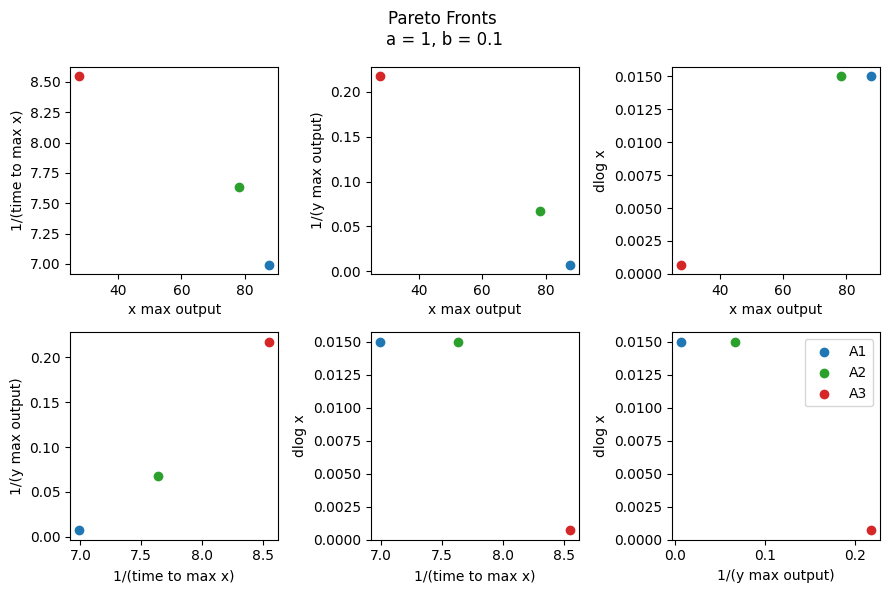

In [49]:
elements = [0, 1, 2, 3]

# Generate all combinations of length 2
combinations_of_two = list(combinations(elements, 2))

# Print the results
print(combinations_of_two)
print(len(combinations_of_two))
import math
ncols = 3
nrows = math.ceil(len(combinations_of_two)/ncols)
fig,axs = plt.subplots(nrows = nrows, ncols = ncols,figsize = (3*ncols,3*nrows))
for i in range(len(combinations_of_two)):
    ax = axs[int(i/ncols),i%ncols]
    col1 = df_maximize.columns[combinations_of_two[i][0]]
    col2 = df_maximize.columns[combinations_of_two[i][1]]
    if i==len(combinations_of_two)-1:
        ax.scatter(df_maximize.loc['A1'][col1],df_maximize.loc['A1'][col2],c = 'tab:blue',label = 'A1')
        ax.scatter(df_maximize.loc['A2'][col1],df_maximize.loc['A2'][col2],c = 'tab:green',label = 'A2')
        ax.scatter(df_maximize.loc['A3'][col1],df_maximize.loc['A3'][col2],c = 'tab:red',label = 'A3')
        ax.legend()
    else:
        ax.scatter(df_maximize.loc['A1'][col1],df_maximize.loc['A1'][col2],c = 'tab:blue')
        ax.scatter(df_maximize.loc['A2'][col1],df_maximize.loc['A2'][col2],c = 'tab:green')
        ax.scatter(df_maximize.loc['A3'][col1],df_maximize.loc['A3'][col2],c = 'tab:red')
    ax.set_xlabel(col1.replace("_", " "))
    ax.set_ylabel(col2.replace("_", " "))

for i in range(len(combinations_of_two),nrows*ncols):
    ax = axs[int(i/ncols),i%ncols]
    ax.set_axis_off()
fig.suptitle(f'Pareto Fronts \na = {a_value}, b = {b_value}')
fig.tight_layout()
